# Capstone Project Report: New York County State Types and Physical Inactivity Levels

By Renata Bastos Gottgtroy, June 2020

Please note: The code that corresponds to this work can be found on my github under "IBM Course 9 Capstone Project Code"

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

Regular physical activity can have many positive outcomes to the individual. Some of these benefits include:
- Reduced risk of a heart attack, type 2 diaetes, osteoporosis and some cancers
- Weight management 
- Decreased blood cholesterol level and blood pressure
- Increased strength in the bones, muscles and joints
- Decreased risk of falls 
- Improved recovery from periods of hospitalisation or bed rest 
- Feeling better – increased energy, better mood, feel more relaxed and sleep better

While these benefits can improve the lives of individuals, they are also extremely beneficial for the society as a whole. The costs of health related issues that can be reduced through increased physical activity levels are immense. For example, heart diseases cost the United States about $219 billion each year (from 2014 to 2015). This includes the cost of health care services, medicines, and lost productivity due to death.

The Division of Nutrition, Physical Activity and Nutrition (DNPAO) of the Centers for Disease Control and Prevention have a budget of $103.8 million (2019) to improve nutrition, support breastfeeding, increase physical activity, reduce obesity, and reduce disparities. To meet these goals, 2 of the functions of the DNPAO is to study interventions to identify the best ways to create healthier environments in early care and education (ECE) facilities, worksites, hospitals, and communities, and share information to help decision makers understand how to improve their communities to support healthy eating and active living. Information on factors that predict physical activity levels are therefore valuable to the DNPAO.

There are several barriers to physical activity. One of the commonly reported barriers to physical activity is access to physical activity friendly spaces and facilities such as parks and gyms. There may also be venues that discourage physical actvity, for example fast food joints. Information on the most common venues in an area and their ability to predict physical activity levels could indicate barriers and facilitators of physical activity. The output of this project could be used by the DNPAO to identify what types of venues define areas and their associated physical activity levels. Therefore, the aim of this project is to explore if County type (by form of common venues in a County) can predict physical activity levels.

References: 
- https://www.betterhealth.vic.gov.au/health/healthyliving/physical-activity-its-important
- https://www.cdc.gov/heartdisease/facts.htm
- https://www.cdc.gov/nccdphp/dnpao/division-information/aboutus/index.htm
- https://www.physio-pedia.com/Barriers_to_Physical_Activity

## Data <a name="data"></a>

In order to explore if County types predict the physical activity levels of Americans in the New York State, two datasets will be used. 

Physical activity level data will be sourced from the New York Health Foudation organisation website. This dataset contains the percentage of physically inactive adults per County in the New York State for the years 2004-2013. Physical inactivity was defined by participants answering "no" to the following question: 

“During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?” 

Foursquare location data will be used to extract the different venue categories. To correspond to the physical activity data, the number of different venue categories will be extrated by County in the state of New York. A list of possible categories that will be extracted from the Foursquare database can be found on: https://developer.foursquare.com/docs/build-with-foursquare/categories/.

https://nyshealthfoundation.org/resource/health-behaviors-ny-us/?gclid=Cj0KCQjwoub3BRC6ARIsABGhnyaucAj-Ug2vAs6fpmbs5Vp-5Jp5HqhdgYZgQ9FY85K7jxD3UwWbr-8aAkDXEALw_wcB#physical-inactivity-by-new-york-county

## Methodology <a name="methodology"></a>

1. Physical inactivity data preparation

Physical inactivity data were downloaded onto the local computer and read into a pandas dataframe. The Dataframe was cleaned in order to only keep relevant information. The OpenCage API was used to retrieve the coordinates for the Counties in the state of New York. This was visualized using the folium library.

2. Venue data preparation

Venue data were retrieved by calling the Foursquare API. Only relevant information was stored into a dataframe and then explored. The data was one hot encoded in order to be analysed. A dataframe with the 10 most common venues in each county was created. 

3. Feature reduction by clustering Counties 

In order to reduce the number of features, Kmeans clustering was used. The number of clusters was chosen based on the elbow method and the silhouette score. The Kmeans algorithm was applied to the data and the clusters were visualised using the folium library once again.

4. Predict physical inactivty based on County clusters

In order to predict physical inactivity based on the clusters, the target variable (percentage of physical inacitivity) was converted into 4 categories: "Least active", "Somewhat inactive", "Somewhat active" and "Most active" based on quartiles. Because the target variable became categorical, classification models were used to explore whether County clusters could predict physical activity of each county. Two classification models were chosen, Decision tree and support vector machine. 

To ensure that the models could be evaluated, the data was split into a training set (80%) and a test set (20%). The models were then trained on the training set. The models were evaluated on the test set using F1 score and the Jaccard similarity score.


## Results <a name="results"></a>

The Elbow method and the Silhouette score revealed the 3 clusters would best cluster the Counties based on their most common venue catgeories. 

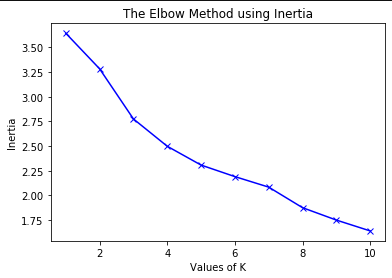 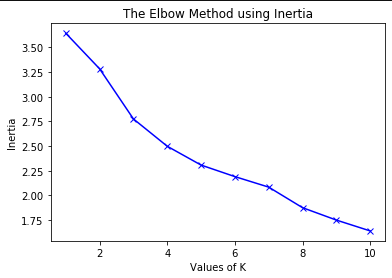

This resulted in 60 Counties being clustered into 1 cluster, and only 1 County in the remaining two clusters. This can be visualised in the image below:

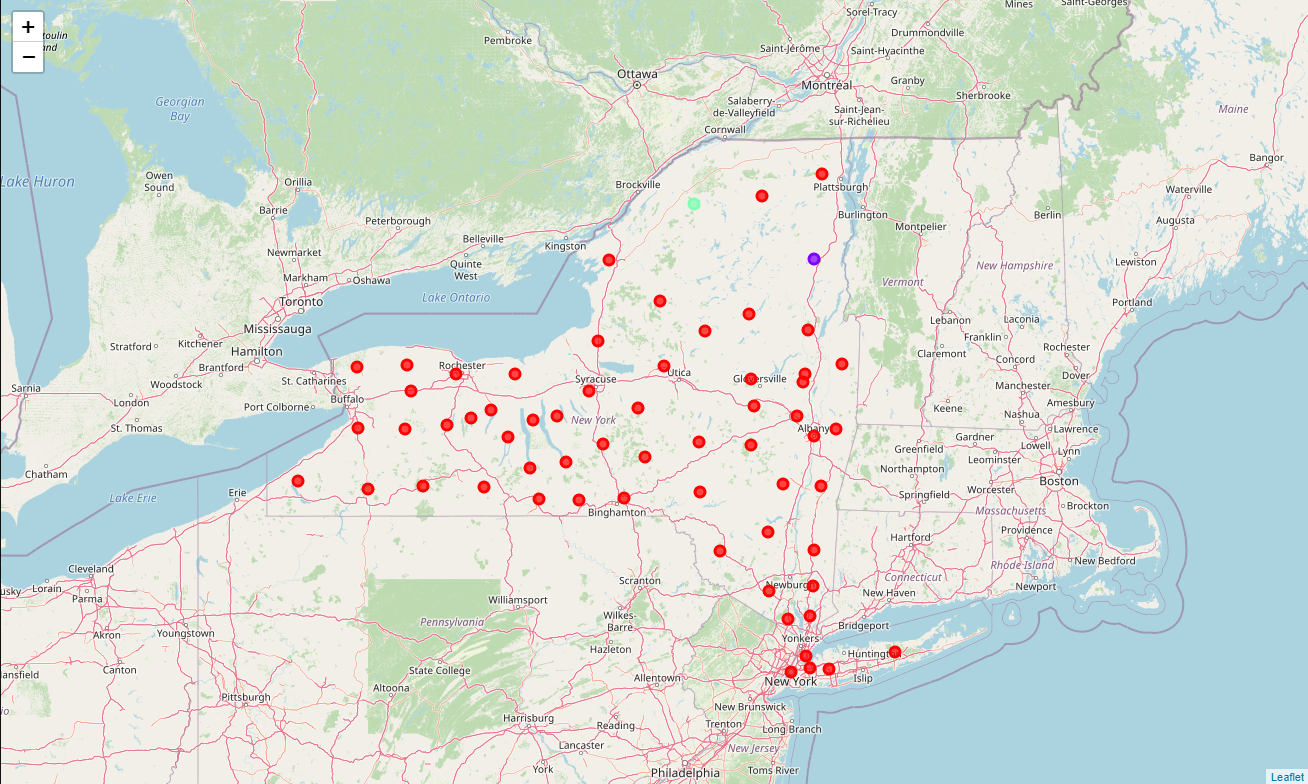

The Decision Tree and the support vector machine models both had an f1 score of and a jaccard similarity score of 0.04 and 0.02 respectively. 

## Discussion <a name="discussion"></a>

The accuracy of both of the models built were very low as shown by the F1 score and the Jaccard similairty score. This shows that the clusters created based on the 10 most common venues in each County, was unable to predict the physical activity levels of the corresponding County. However, this is most likely due to the fact that the venue categories were very narrowly defined, making it difficult for the clustering algorithm to find similarities between Counties based on the 10 most common category types. This caused a very uneven and most crude clustering of the Counties which inhibited the classification agorithms from performing well. 

The Foursquare data does not provide the parent category ID of each venue. For example, the parent category of "indian restaurant" is "restaurants", and the parent category of "gym" is "outdoor and recreation". The only way of retrieving this information is to retrieve information of each venue name. This type of call at the number of calls neede, would have been blocked by Foursquare on a free account. This was a limitation to this project. It is hypothesized that if the 10 most common venues were based on the parent categories of each venue, the clustering algorithm would have performed better, in turn, showing a better prediction result.

## Conclusion <a name="conclusion"></a>

County type, defined by the 10 most common venue categories in each county, was unable to predict the physical activity levels of the corresponding county. Further research should better define venue categories in order to explore whether the most common types of venues within a county can predict physical activity levels. 